In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

def bileteral_filter(img, d, sigmaColor, sigmaSpace):
    return cv2.bilateralFilter(img, d=d, sigmaColor=sigmaColor,sigmaSpace=sigmaSpace)

def cartonize(img, edge_mask_line_size, edger_mask_blur_value, number_of_colors, biletareal_filter_d_parameter, biletareal_filter_sigmaColor, biletareal_filter_sigmaSpace, pencil_sigma_space, pencil_sigma_radius, pencil_shade_factor):
    edges = edge_mask(img, edge_mask_line_size, edger_mask_blur_value)
    colors = color_quantization(img, number_of_colors)
    colors = bileteral_filter(colors, biletareal_filter_d_parameter, biletareal_filter_sigmaColor, biletareal_filter_sigmaSpace)
    cartoon = cv2.bitwise_and(colors, colors, mask=edges)
    _ , pencil = cv2.pencilSketch(cartoon, sigma_s=pencil_sigma_space, sigma_r=pencil_sigma_radius, shade_factor=pencil_shade_factor)
    return pencil

In [2]:
img = cv2.imread("img/eu.png")

In [3]:
img.shape

(872, 1160, 3)

In [38]:
cartoon = cartonize(img, edge_mask_line_size=3, 
                         edger_mask_blur_value=29, 
                         number_of_colors=128, 
                         biletareal_filter_d_parameter=7, 
                         biletareal_filter_sigmaColor=50, 
                         biletareal_filter_sigmaSpace=500, 
                         pencil_sigma_space=65, 
                         pencil_sigma_radius=0.06, 
                         pencil_shade_factor=0.01)

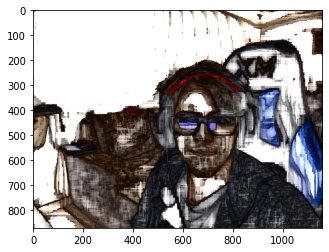

In [39]:
plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))